In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.shape

(23, 2)

Text(0, 0.5, 'Height')

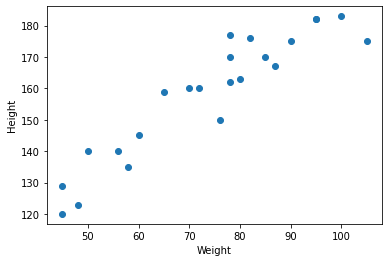

In [7]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [60]:
#divide dataset into independent and dependent feature
X = df[['Weight']]
y = df['Height']

In [61]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [62]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
#standardise the data as thre maybe different units used
from sklearn.preprocessing import StandardScaler


In [66]:
scaler = StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

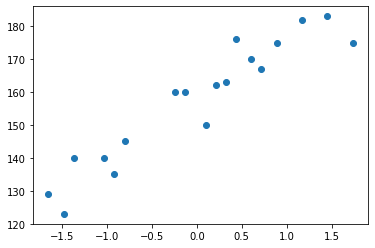

In [69]:
plt.scatter(X_train,y_train)

In [70]:
#train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [71]:
regressor = LinearRegression()

In [72]:
regressor.fit(X_train,y_train)

LinearRegression()

In [73]:
print("Slope or coeffecient: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

Slope or coeffecient:  [17.03440872]
Intercept:  157.5


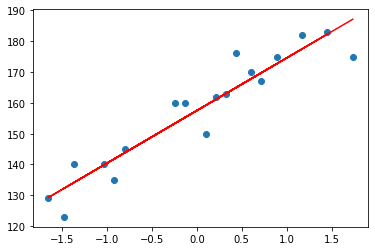

In [74]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [75]:
y_pred_test = regressor.predict(X_test)

In [76]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [77]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

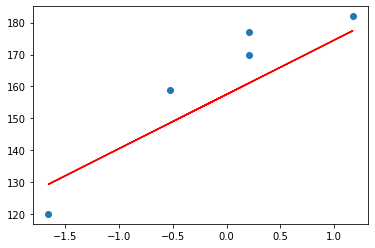

In [78]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

### Performance Metrics

In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [80]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [81]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [82]:
score

0.776986986042344

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [83]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [84]:
regressor

LinearRegression()

In [85]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Python 3.9.7\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [86]:
scaled_weight[0]

array([0.32350772])

In [87]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]
